<a href="https://colab.research.google.com/github/TanishthaSingh23/Machine-Learning-repo/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas scikit_learn matplotlib seaborn

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


In [ ]:
X,y=make_blobs(n_samples=300,centers=4,random_state=42)#samples is used to give how many samples datapoint you want to generate,centers is used to tell how many cluster points will  be there,#random state is used to restrict the datapoint to change if we run it again.

In [ ]:
print(X.shape)#gives the size of matrics

(300, 2)


In [ ]:
print(y[0])

3


In [ ]:
kmeans_model=KMeans(n_clusters=4,random_state=42)

In [ ]:
kmeans_model.fit(X)#to fit the model according to the x dataset that we provided

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

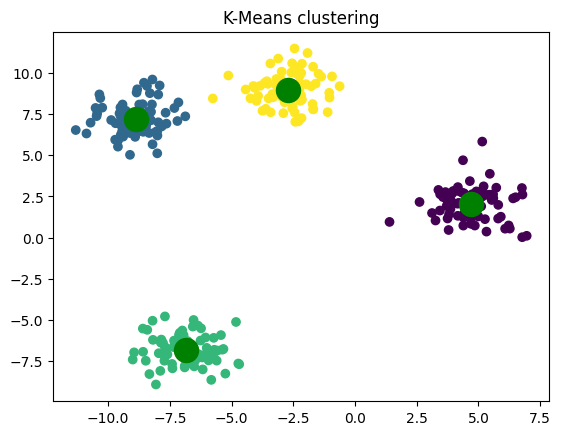

In [ ]:
plt.scatter(X[:,0],X[:,1],c=kmeans_model.labels_,cmap='viridis')
plt.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,1],s=300,c='green')
plt.title("K-Means clustering")
plt.show()

In [ ]:
#hierarchial clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,  linkage

In [ ]:
X,y=make_blobs(n_samples=300,centers=4,random_state=42)



In [ ]:
hierarchy_model=AgglomerativeClustering(n_clusters=4)

In [ ]:
agg_labels=hierarchy_model.fit_predict(X)

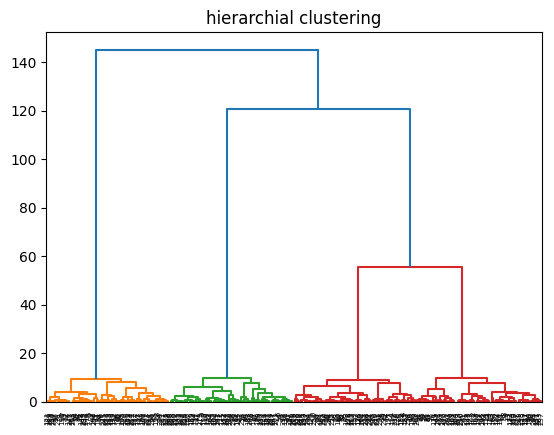

In [ ]:
linkage_matrix=linkage(X,'ward')
dendrogram(linkage_matrix)
plt.title("hierarchial clustering")
plt.show()

In [ ]:
#DBSCAN -  Density Based Spatial Clustering of Applications with noise
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons


In [ ]:
X,_=make_moons(n_samples=300,noise=0.05,random_state=42)

In [ ]:
dbscan_model=DBSCAN(eps=0.3,min_samples=5,)#hyperparameter tuning

In [ ]:
dbscan_labels=dbscan_model.fit_predict(X)

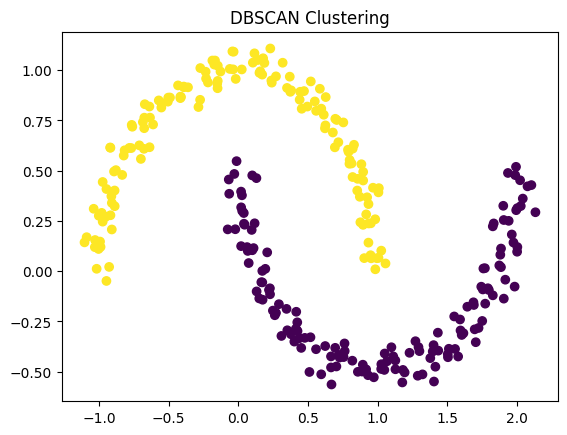

In [ ]:
plt.scatter(X[:,0],X[:,1],c=dbscan_labels,cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()

In [ ]:
import pandas as pd

In [ ]:
customer_data=pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [ ]:
customer_data

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
customer_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
X=customer_data.iloc[:,[3,4]].values

In [ ]:
print(X[0])

[15 39]


In [ ]:
#WCSS -Within cluster sum of Squares
# wcss - within cluster sum of square
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i , init='k-means++' , random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

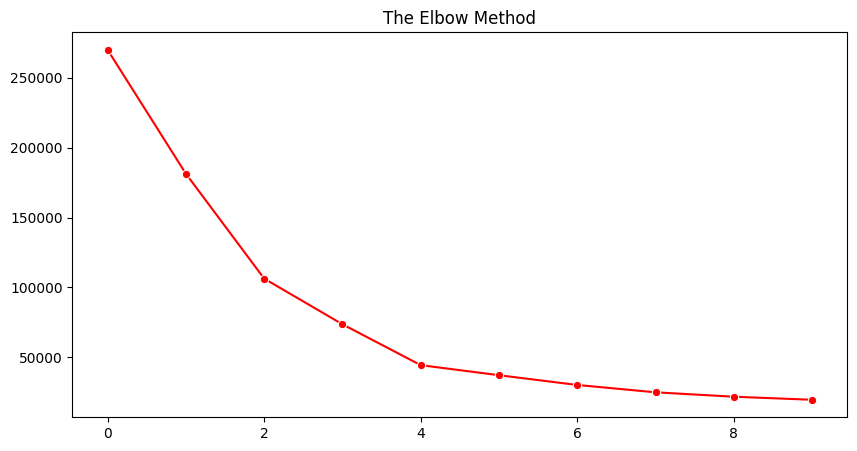

In [ ]:
#Elbow method
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(wcss,marker='o',color='red')
plt.title("The Elbow Method")
plt.show()

In [ ]:
kmeans_with_wcss=KMeans(n_clusters=i , init='k-means++' , random_state=42)
y_labels=kmeans_with_wcss.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


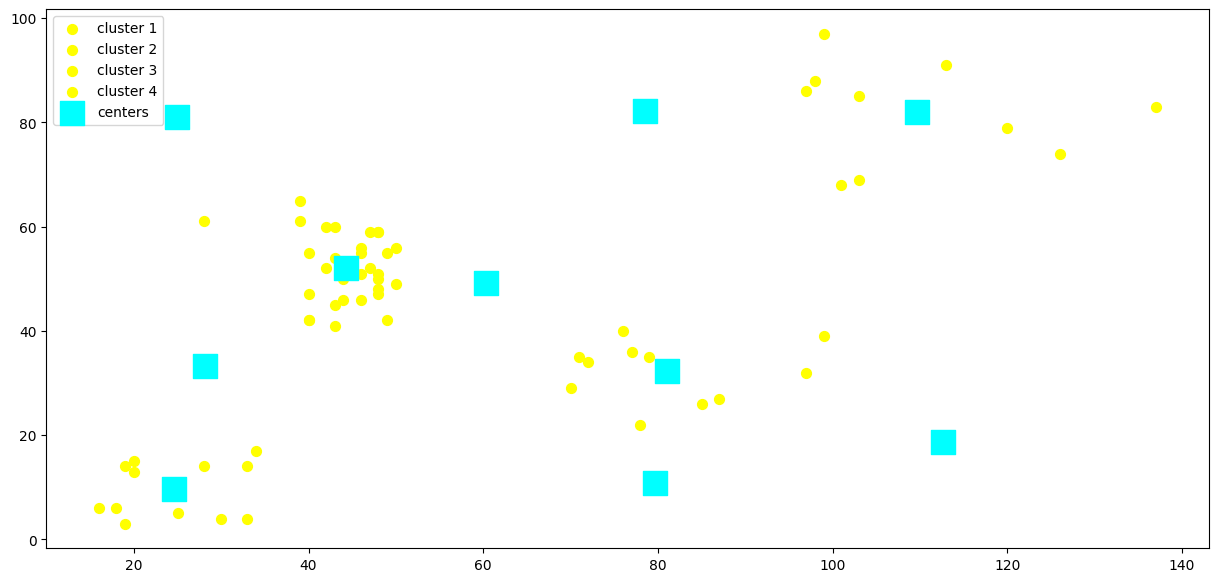

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(X[y_labels==0,0], X[y_labels==0,1], color='yellow', label='cluster 1', s=50)
plt.scatter(X[y_labels==1,0], X[y_labels==1,1], color='yellow', label='cluster 2', s=50)
plt.scatter(X[y_labels==2,0], X[y_labels==2,1], color='yellow', label='cluster 3', s=50)
plt.scatter(X[y_labels==3,0], X[y_labels==3,1], color='yellow', label='cluster 4', s=50)
plt.scatter(kmeans_with_wcss.cluster_centers_[:,0],kmeans_with_wcss.cluster_centers_[:,1],color='cyan',label='centers',s=300, marker=',')
plt.legend()
plt.show()